In [15]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
# 기본 데이터셋
bank_df = pd.read_csv('../data/bank/bank-full.csv', sep=';')
print('기본 데이터셋 크기:', bank_df.shape)

# 추가 데이터셋
bank_additional_df = pd.read_csv('../data/bank-additional/bank-additional-full.csv', sep=';')
print('추가 데이터셋 크기:', bank_additional_df.shape)

# 데이터 미리보기
print('\n기본 데이터셋 미리보기:')
display(bank_df.head())
print('\n추가 데이터셋 미리보기:')
display(bank_additional_df.head())

# 기본적인 정보 확인
print('\n기본 데이터셋 정보:')
print(bank_df.info())
print('\n추가 데이터셋 정보:')
print(bank_additional_df.info())

기본 데이터셋 크기: (45211, 17)
추가 데이터셋 크기: (41188, 21)

기본 데이터셋 미리보기:


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no


추가 데이터셋 미리보기:


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]


기본 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

추가 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 t

# 데이터셋 기본 정보 분석

기본 데이터셋과 추가 데이터셋을 불러와서 기본적인 정보를 확인했습니다.

데이터셋 크기
- 기본 데이터셋: 45,211개의 행과 17개의 열
- 추가 데이터셋: 41,188개의 행과 21개의 열

주요 변수
- 고객 정보: 나이, 직업, 결혼여부, 학력 등
- 캠페인 관련: 통화 기간, 캠페인 횟수, 이전 캠페인 결과 등
- 사회경제적 지표: 고용변동률, 소비자물가지수, 유리보금리 등
- 목표변수(y): 예금 가입 여부 (yes/no)

데이터 품질
- 결측치는 'unknown' 값으로 표시되어 있음
- 범주형/수치형 변수가 혼재되어 있어 전처리 필요

In [16]:
# 결측치 확인
print('기본 데이터셋 결측치 현황:')
print(bank_df.isnull().sum())
print('\n추가 데이터셋 결측치 현황:')
print(bank_additional_df.isnull().sum())

# 'unknown' 값 확인 (문자열 데이터의 경우 'unknown'이 결측치를 나타낼 수 있음)
print('\n기본 데이터셋 unknown 값 현황:')
for col in bank_df.select_dtypes(include=['object']).columns:
    unknown_count = (bank_df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f'{col}: {unknown_count} ({(unknown_count/len(bank_df)*100):.2f}%)')

print('\n추가 데이터셋 unknown 값 현황:')
for col in bank_additional_df.select_dtypes(include=['object']).columns:
    unknown_count = (bank_additional_df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f'{col}: {unknown_count} ({(unknown_count/len(bank_additional_df)*100):.2f}%)')

# 결측치 처리
def handle_missing_values(df):
    df_processed = df.copy()
    
    # 수치형 컬럼 결측치 처리
    numeric_columns = df_processed.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_columns:
        if df_processed[col].isnull().sum() > 0:
            # 중앙값으로 대체
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    # 범주형 컬럼의 'unknown' 처리
    categorical_columns = df_processed.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if (df_processed[col] == 'unknown').sum() > 0:
            # 최빈값으로 대체
            mode_value = df_processed[col][df_processed[col] != 'unknown'].mode()[0]
            df_processed[col] = df_processed[col].replace('unknown', mode_value)
    
    return df_processed

# 결측치 처리 적용
bank_df_processed = handle_missing_values(bank_df)
bank_additional_df_processed = handle_missing_values(bank_additional_df)

# 결과 확인
print('\n처리 후 기본 데이터셋 unknown 값 현황:')
for col in bank_df_processed.select_dtypes(include=['object']).columns:
    unknown_count = (bank_df_processed[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f'{col}: {unknown_count}')

print('\n처리 후 추가 데이터셋 unknown 값 현황:')
for col in bank_additional_df_processed.select_dtypes(include=['object']).columns:
    unknown_count = (bank_additional_df_processed[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f'{col}: {unknown_count}')

기본 데이터셋 결측치 현황:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

추가 데이터셋 결측치 현황:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

기본 데이터셋 unknown 값 현황:
job: 288 (0.64%)
education: 1857 (4.11%)
contact: 13020 (28.80%)
poutcome: 36959 (81.75%)

추가 데이터셋 unknown 값 현황:
job: 330 (0.80%)
marital: 80 (0.19%)
education: 1731 (4.20%)
default: 8597 (20.87%)
housing: 990 (2.40%)
loan: 990 (2.40%)

처리 후 기

In [17]:
# 범주형 변수 처리를 위한 함수 정의
def apply_one_hot_encoding(df):
    df_encoded = df.copy()
    
    # 범주형 변수 식별 (object 타입)
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # y 변수는 별도 처리
    if 'y' in categorical_columns:
        categorical_columns = categorical_columns.drop('y')
        # y 변수 레이블 인코딩 (no=0, yes=1)
        df_encoded['y'] = (df_encoded['y'] == 'yes').astype(int)
    
    # One-Hot Encoding 적용
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, prefix=categorical_columns)
    
    return df_encoded

# 인코딩 적용
bank_df_encoded = apply_one_hot_encoding(bank_df_processed)
bank_additional_df_encoded = apply_one_hot_encoding(bank_additional_df_processed)

# 결과 확인
print('인코딩 후 기본 데이터셋 형태:', bank_df_encoded.shape)
print('인코딩 후 추가 데이터셋 형태:', bank_additional_df_encoded.shape)

# 처리된 컬럼 확인
print('\n기본 데이터셋 처리된 컬럼:')
print(bank_df_encoded.columns.tolist())
print('\n추가 데이터셋 처리된 컬럼:')
print(bank_additional_df_encoded.columns.tolist())

인코딩 후 기본 데이터셋 형태: (45211, 48)
인코딩 후 추가 데이터셋 형태: (41188, 58)

기본 데이터셋 처리된 컬럼:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']

추가 데이터셋 처리된 컬럼:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entre

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 데이터 분리
X = bank_df_encoded.drop('y', axis=1)
y = bank_df_encoded['y']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용 전 클래스 분포 확인
print('SMOTE 적용 전 훈련 데이터 클래스 분포:')
print(Counter(y_train))

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 클래스 분포 확인
print('\nSMOTE 적용 후 훈련 데이터 클래스 분포:')
print(Counter(y_train_balanced))

# 데이터 크기 확인
print('\n원본 훈련 데이터 크기:', X_train.shape)
print('SMOTE 적용 후 훈련 데이터 크기:', X_train_balanced.shape)

# 테스트 데이터는 그대로 유지
print('테스트 데이터 크기:', X_test.shape)

SMOTE 적용 전 훈련 데이터 클래스 분포:
Counter({0: 31970, 1: 4198})

SMOTE 적용 후 훈련 데이터 클래스 분포:
Counter({0: 31970, 1: 31970})

원본 훈련 데이터 크기: (36168, 47)
SMOTE 적용 후 훈련 데이터 크기: (63940, 47)
테스트 데이터 크기: (9043, 47)


# 탐색적 데이터 분석

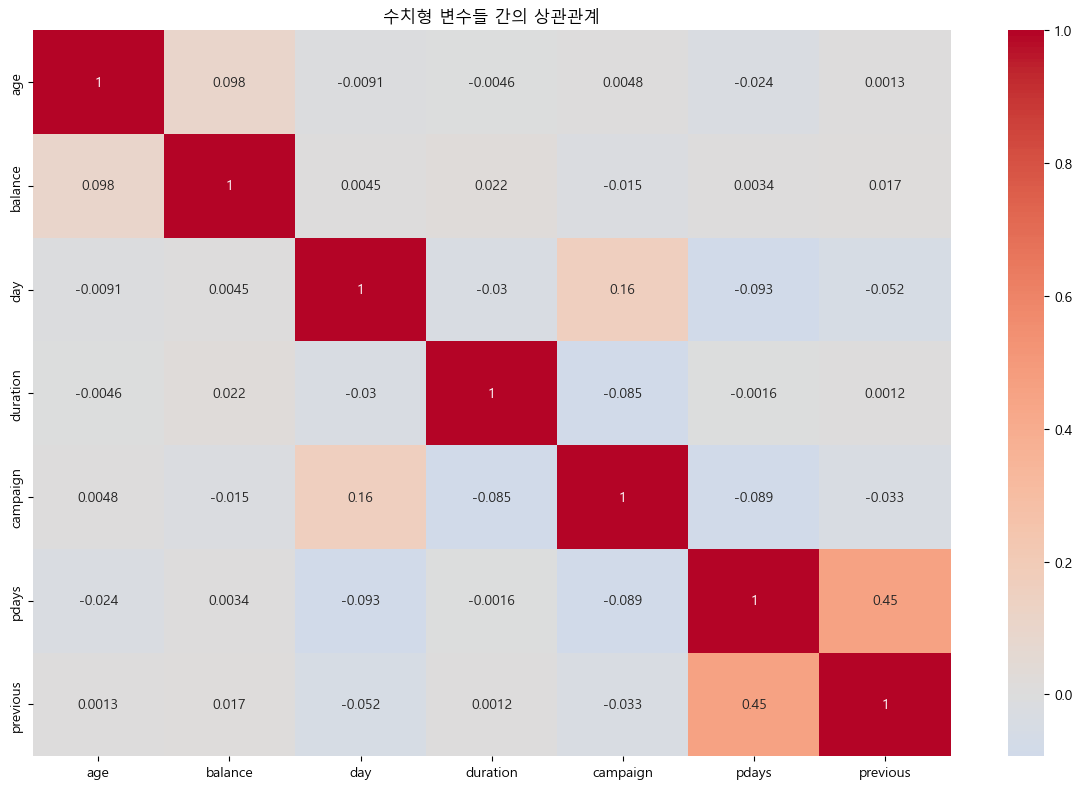

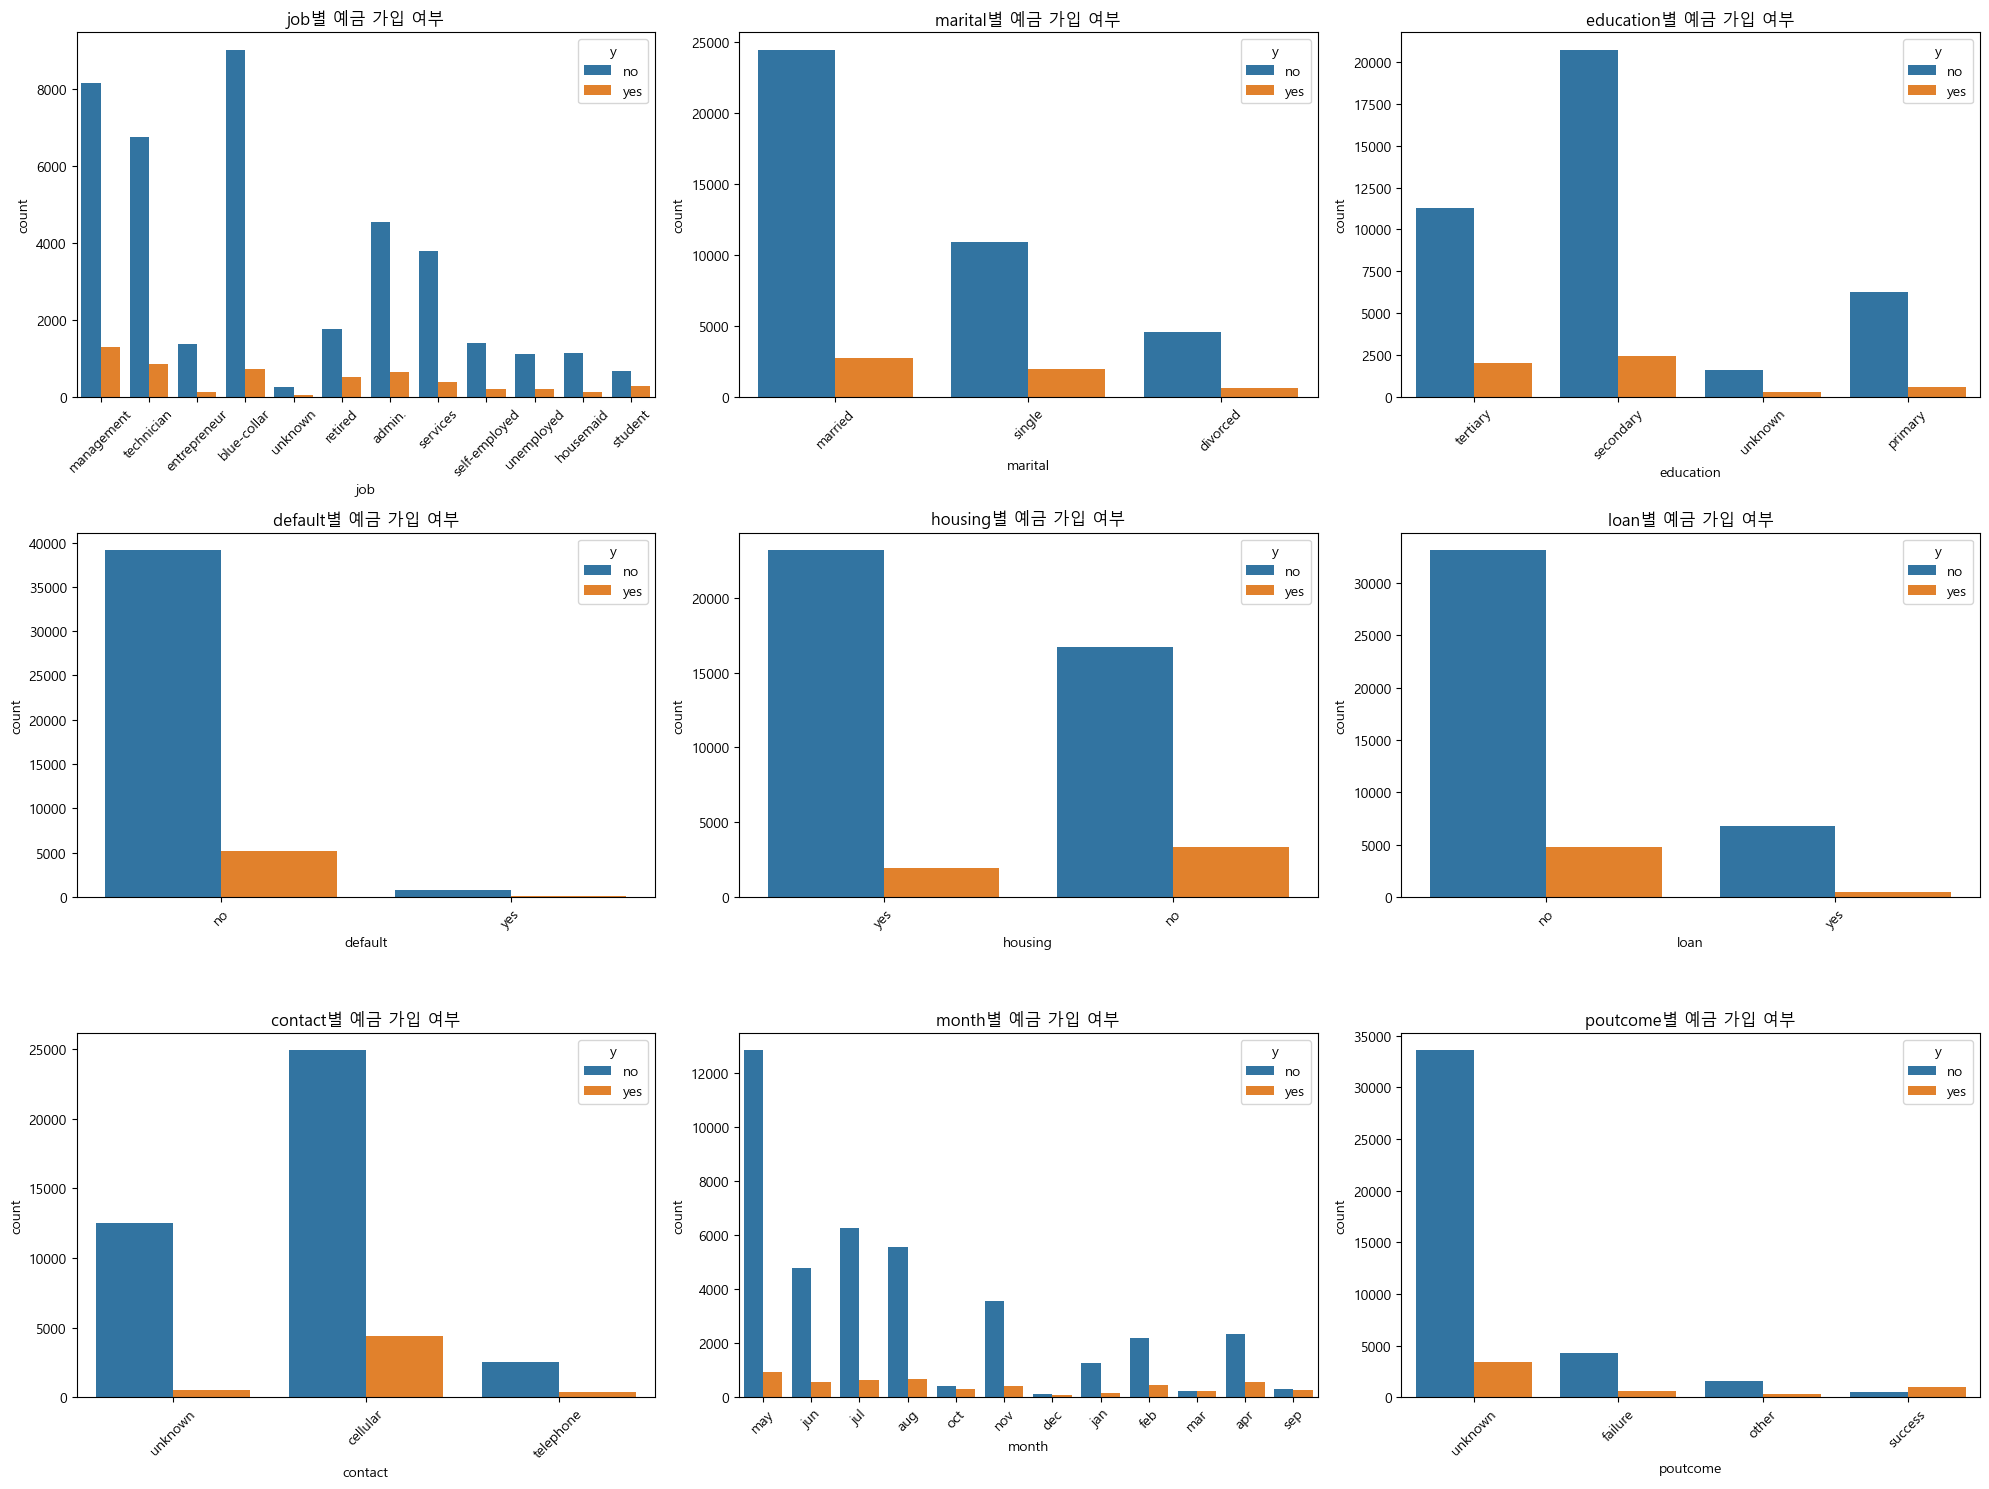

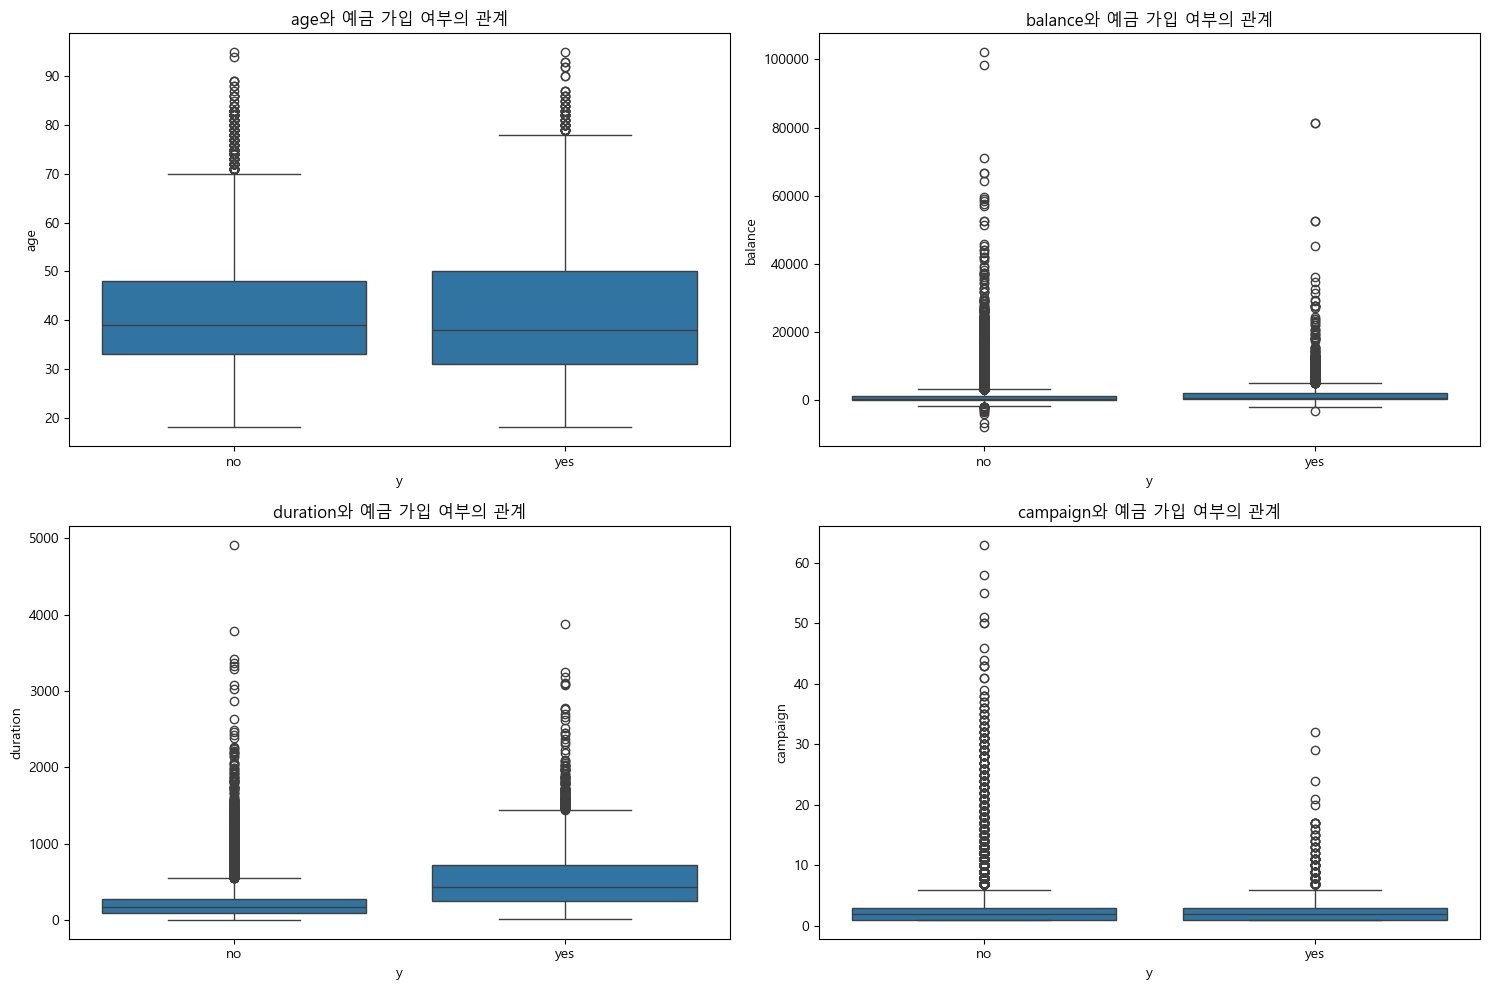


수치형 변수들의 기본 통계량:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%      

In [19]:
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 수치형 변수들의 상관관계 분석
numeric_columns = bank_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = bank_df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('수치형 변수들 간의 상관관계')
plt.tight_layout()
plt.savefig("상관관계.png")
plt.show()

# 범주형 변수와 목표변수('y') 간의 관계 분석
categorical_columns = bank_df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('y')  # 목표변수 제외

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for idx, col in enumerate(categorical_columns[:9]):  # 처음 9개 변수만 시각화
    sns.countplot(data=bank_df, x=col, hue='y', ax=axes[idx])
    axes[idx].set_title(f'{col}별 예금 가입 여부')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("예금가입여부.png")
plt.show()

# 주요 수치형 변수들의 분포 시각화
numeric_vars = ['age', 'balance', 'duration', 'campaign']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_vars):
    sns.boxplot(data=bank_df, x='y', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col}와 예금 가입 여부의 관계')

plt.tight_layout()
plt.savefig("예금가입여부관계.png")
plt.show()

# 기본 통계량 출력
print("\n수치형 변수들의 기본 통계량:")
print(bank_df[numeric_columns].describe())

# 목표변수 분포 시각화

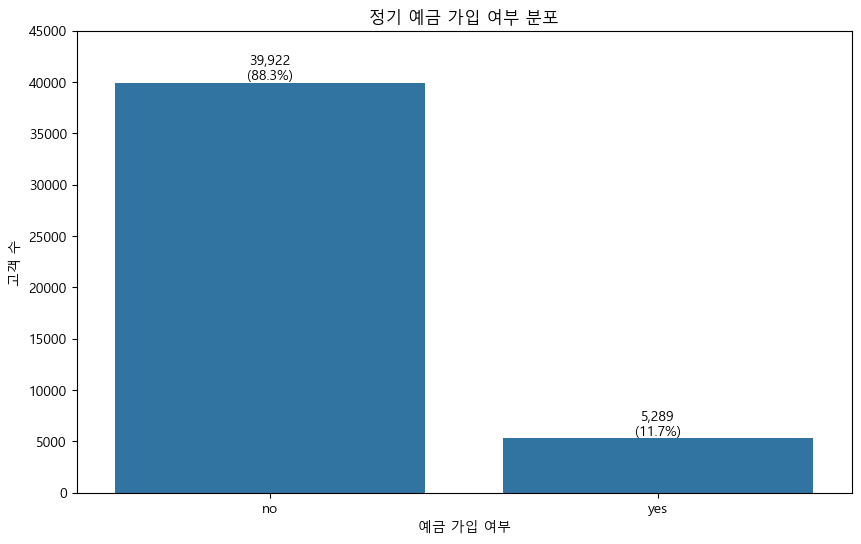


정기 예금 가입 여부 분포:
y
no     39,922
yes     5,289
Name: count, dtype: object

비율:
y
no     88.3
yes    11.7
Name: proportion, dtype: float64 %


In [20]:
# 목표변수 분포 시각화
plt.figure(figsize=(10, 6))

# 막대 그래프
sns.countplot(data=bank_df, x='y')
plt.title('정기 예금 가입 여부 분포')
plt.xlabel('예금 가입 여부')
plt.ylabel('고객 수')

# y축 범위 설정
plt.ylim(0, 45000)

# 수치 표시 (천단위 쉼표 적용)
total = len(bank_df)
for p in plt.gca().patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.1f}%'
    plt.annotate(f'{count:,}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

# 상세 통계 (천단위 쉼표 적용)
print("\n정기 예금 가입 여부 분포:")
distribution = bank_df['y'].value_counts()
print(distribution.apply(lambda x: format(x, ',')))
print("\n비율:")
print(bank_df['y'].value_counts(normalize=True).round(3) * 100, '%')

# 결과 내용 정리

In [21]:
# 필요한 모듈 설치
# !pip install python-pptx

# 필요한 라이브러리 임포트
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor

# 새로운 프레젠테이션 생성
prs = Presentation()

# 1. 제목 슬라이드 추가
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "정기 예금 가입 현황 분석"
subtitle.text = "데이터 기반 고객 행동 분석"

# 2. 분포 분석 슬라이드 추가
bullet_slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(bullet_slide_layout)
shapes = slide.shapes

title_shape = shapes.title
body_shape = shapes.placeholders[1]

title_shape.text = "정기 예금 가입 분포 분석"

tf = body_shape.text_frame
tf.text = "전체적인 분포"

p = tf.add_paragraph()
p.text = "• 미가입(no): 39,922명 (88.3%)"
p.level = 1

p = tf.add_paragraph()
p.text = "• 가입(yes): 5,289명 (11.7%)"
p.level = 1

p = tf.add_paragraph()
p.text = "• 총 고객 수: 45,211명"
p.level = 1

p = tf.add_paragraph()
p.text = "\n데이터 불균형 특징"
p.level = 0

p = tf.add_paragraph()
p.text = "• 약 7.5:1의 비율로 심각한 클래스 불균형 존재"
p.level = 1

p = tf.add_paragraph()
p.text = "• 가입자(소수 클래스)가 전체의 11.7%에 불과"
p.level = 1

# 3. 시사점 슬라이드 추가
slide = prs.slides.add_slide(bullet_slide_layout)
shapes = slide.shapes

title_shape = shapes.title
body_shape = shapes.placeholders[1]

title_shape.text = "분석 시사점"

tf = body_shape.text_frame
tf.text = "모델링 관점"

p = tf.add_paragraph()
p.text = "• SMOTE와 같은 오버샘플링 기법 적용 필요"
p.level = 1

p = tf.add_paragraph()
p.text = "• 클래스 가중치 조정 고려"
p.level = 1

p = tf.add_paragraph()
p.text = "• F1-score, AUC-ROC 등 불균형 데이터에 적합한 평가 지표 사용"
p.level = 1

p = tf.add_paragraph()
p.text = "\n비즈니스 관점"
p.level = 0

p = tf.add_paragraph()
p.text = "• 정기 예금 가입률이 11.7%로 낮은 편 → 마케팅 전략 개선 필요"
p.level = 1

p = tf.add_paragraph()
p.text = "• 소수의 가입자 데이터를 활용한 잠재 고객 식별이 중요"
p.level = 1

# 프레젠테이션 저장
prs.save('정기예금_가입현황_분석.pptx')

print("PPT 파일이 생성되었습니다: '정기예금_가입현황_분석.pptx'")

PPT 파일이 생성되었습니다: '정기예금_가입현황_분석.pptx'


# 머신러닝 모델링

Random Forest 모델 평가 시작...

Random Forest 성능 평가
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043


ROC-AUC Score: 0.9131


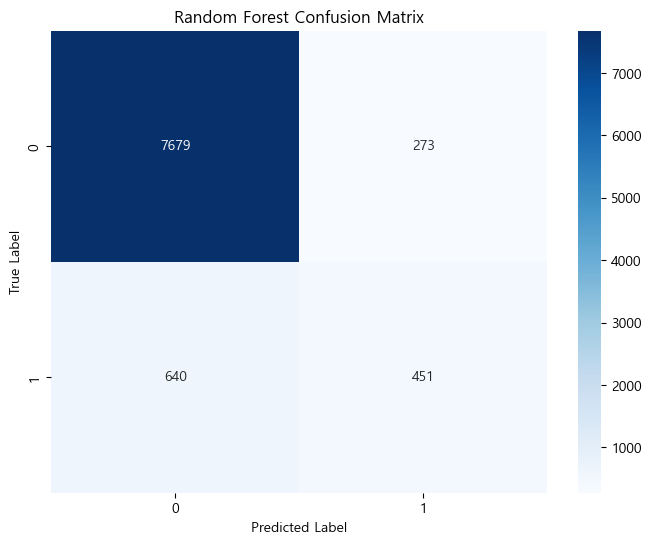


XGBoost 모델 평가 시작...


c:\Users\campus3S043\Desktop\cursor_bank_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:44:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost 성능 평가
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7952
           1       0.63      0.50      0.56      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.73      0.75      9043
weighted avg       0.90      0.90      0.90      9043


ROC-AUC Score: 0.9265


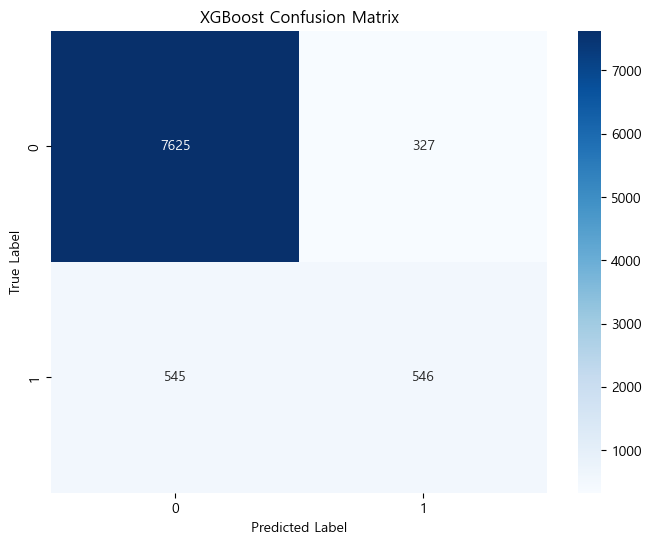

In [22]:
# 필요한 라이브러리 임포트
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 기본 모델 생성
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=100,
    objective='binary:logistic',
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 모델 평가 함수
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # 성능 평가
    print(f"\n{model_name} 성능 평가")
    print("-" * 50)
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return model

# Random Forest 모델 평가
print("Random Forest 모델 평가 시작...")
rf_base = evaluate_model(rf_model, X_train_balanced, y_train_balanced, 
                        X_test, y_test, "Random Forest")

# XGBoost 모델 평가
print("\nXGBoost 모델 평가 시작...")
xgb_base = evaluate_model(xgb_model, X_train_balanced, y_train_balanced, 
                         X_test, y_test, "XGBoost")

## RFE 특성 조합

Random Forest 특성 중요도 분석


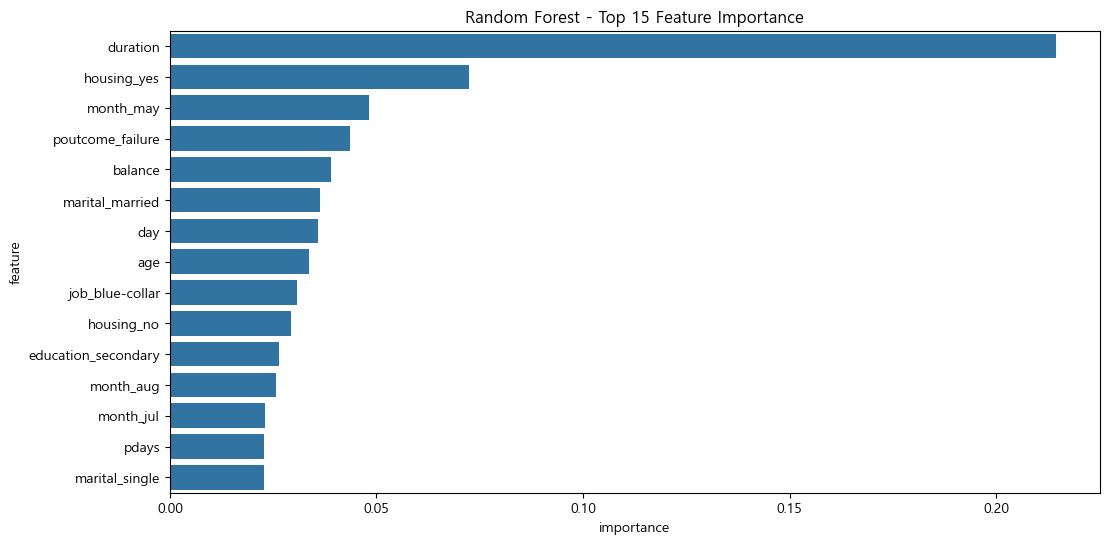


Top 10 중요 특성:
             feature  importance
3           duration    0.214361
27       housing_yes    0.072431
40         month_may    0.048301
44  poutcome_failure    0.043518
1            balance    0.039067
19   marital_married    0.036294
2                day    0.035911
0                age    0.033615
8    job_blue-collar    0.030802
26        housing_no    0.029327

XGBoost 특성 중요도 분석


c:\Users\campus3S043\Desktop\cursor_bank_predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:44:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


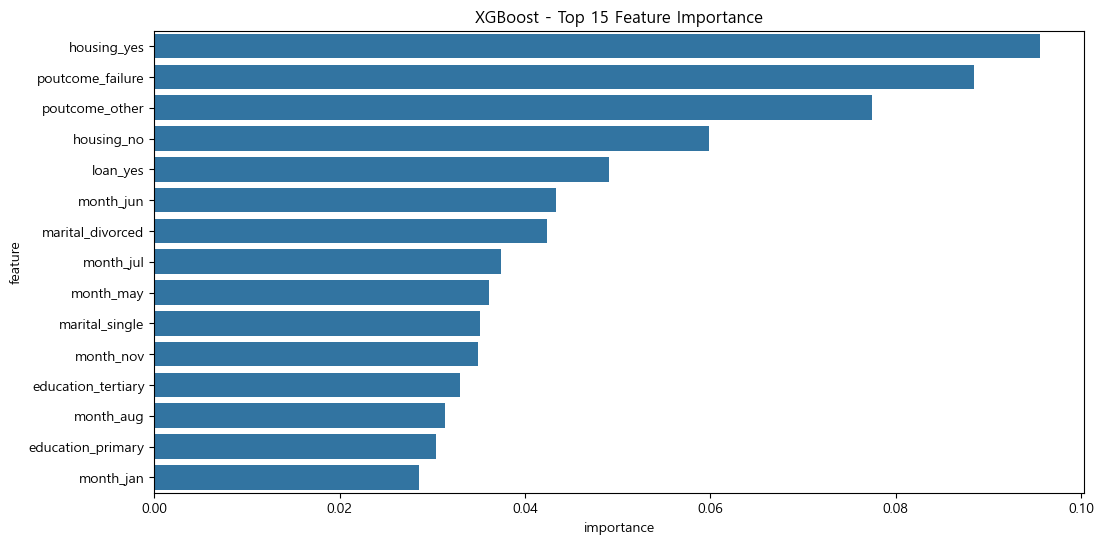


Top 10 중요 특성:
             feature  importance
27       housing_yes    0.095588
44  poutcome_failure    0.088438
45    poutcome_other    0.077452
26        housing_no    0.059818
29          loan_yes    0.049054
38         month_jun    0.043399
18  marital_divorced    0.042372
37         month_jul    0.037470
40         month_may    0.036165
20    marital_single    0.035165

선택된 특성으로 Random Forest 모델 평가

Random Forest (Selected Features) 성능 평가
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7952
           1       0.43      0.57      0.49      1091

    accuracy                           0.86      9043
   macro avg       0.69      0.73      0.70      9043
weighted avg       0.88      0.86      0.87      9043


ROC-AUC Score: 0.8688


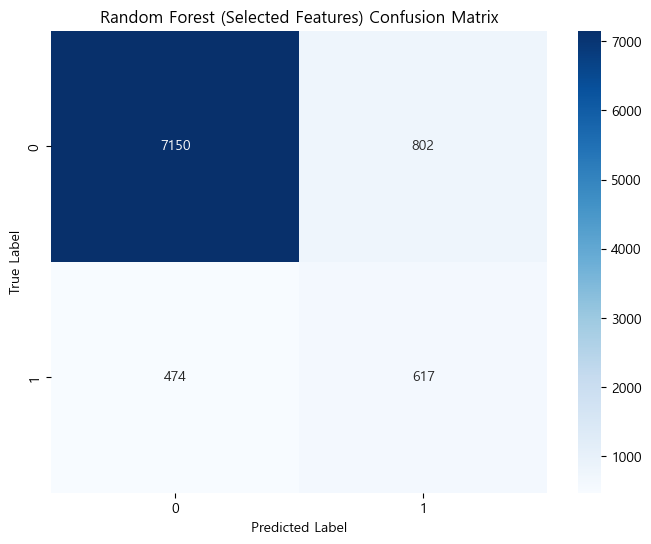


선택된 특성으로 XGBoost 모델 평가

XGBoost (Selected Features) 성능 평가
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7952
           1       0.26      0.34      0.29      1091

    accuracy                           0.80      9043
   macro avg       0.58      0.60      0.59      9043
weighted avg       0.83      0.80      0.81      9043


ROC-AUC Score: 0.6627


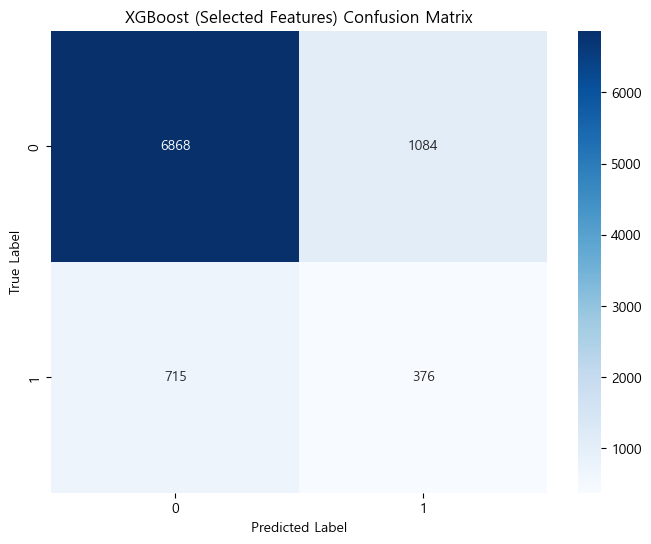

In [23]:
# 특성 중요도 분석 및 선택 함수
def analyze_feature_importance(model, X, y, model_name):
    # 모델 학습
    model.fit(X, y)
    
    # 특성 중요도 추출
    importances = model.feature_importances_
    
    # 특성 중요도를 데이터프레임으로 변환
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    })
    
    # 중요도 기준 정렬
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    # 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
    plt.title(f'{model_name} - Top 15 Feature Importance')
    plt.show()
    
    return feature_importance

# Random Forest 특성 중요도 분석
print("Random Forest 특성 중요도 분석")
rf_importance = analyze_feature_importance(rf_model, X_train_balanced, y_train_balanced, "Random Forest")
print("\nTop 10 중요 특성:")
print(rf_importance.head(10))

# XGBoost 특성 중요도 분석
print("\nXGBoost 특성 중요도 분석")
xgb_importance = analyze_feature_importance(xgb_model, X_train_balanced, y_train_balanced, "XGBoost")
print("\nTop 10 중요 특성:")
print(xgb_importance.head(10))

# 상위 10개 특성 선택
n_features = 10
rf_selected_features = rf_importance['feature'].head(n_features).tolist()
xgb_selected_features = xgb_importance['feature'].head(n_features).tolist()

# 선택된 특성으로 데이터셋 생성
X_train_rf_selected = X_train_balanced[rf_selected_features]
X_test_rf_selected = X_test[rf_selected_features]

X_train_xgb_selected = X_train_balanced[xgb_selected_features]
X_test_xgb_selected = X_test[xgb_selected_features]

# 선택된 특성으로 모델 성능 평가
print("\n선택된 특성으로 Random Forest 모델 평가")
rf_selected = evaluate_model(
    RandomForestClassifier(random_state=42),
    X_train_rf_selected,
    y_train_balanced,
    X_test_rf_selected,
    y_test,
    "Random Forest (Selected Features)"
)

print("\n선택된 특성으로 XGBoost 모델 평가")
xgb_selected = evaluate_model(
    XGBClassifier(random_state=42),
    X_train_xgb_selected,
    y_train_balanced,
    X_test_xgb_selected,
    y_test,
    "XGBoost (Selected Features)"
)

## 하이퍼파라미터 튜닝


Random Forest 하이퍼파라미터 튜닝 시작...
Fitting 2 folds for each of 10 candidates, totalling 20 fits

최적 파라미터: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 20}
최고 ROC-AUC 점수: 0.9678

Random Forest (Tuned) 성능 평가
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7952
           1       0.42      0.59      0.49      1091

    accuracy                           0.85      9043
   macro avg       0.68      0.74      0.70      9043
weighted avg       0.88      0.85      0.86      9043


ROC-AUC Score: 0.8712


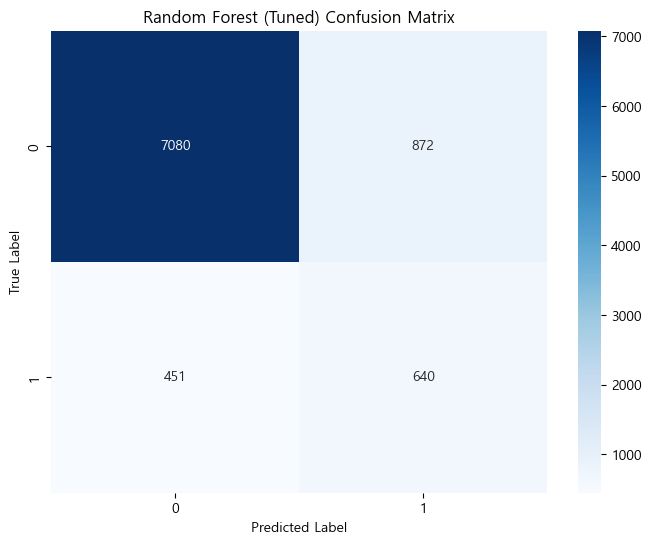


XGBoost 하이퍼파라미터 튜닝 시작...
Fitting 2 folds for each of 10 candidates, totalling 20 fits

최적 파라미터: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
최고 ROC-AUC 점수: 0.8933

XGBoost (Tuned) 성능 평가
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      7952
           1       0.24      0.47      0.32      1091

    accuracy                           0.76      9043
   macro avg       0.58      0.64      0.59      9043
weighted avg       0.84      0.76      0.79      9043


ROC-AUC Score: 0.6713


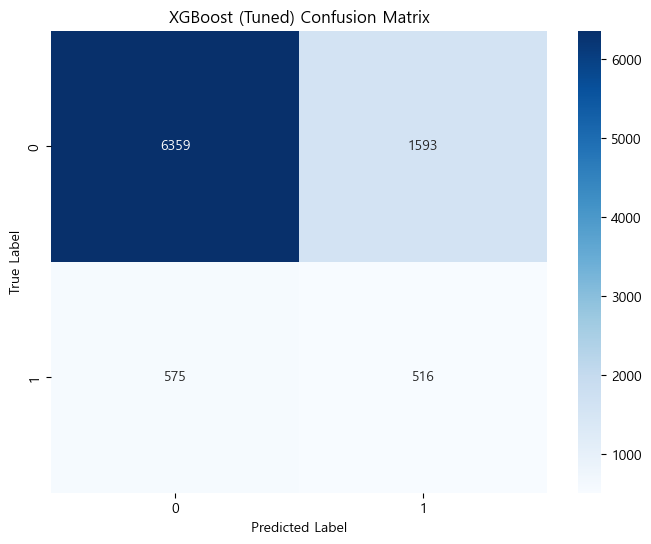


=== 최종 모델 성능 비교 ===

1. 기본 모델
Random Forest ROC-AUC: 0.9131188367602499
XGBoost ROC-AUC: 0.9265224712159298

2. 특성 선택 후
Random Forest ROC-AUC: 0.8688449440916812
XGBoost ROC-AUC: 0.6627279718641823

3. 하이퍼파라미터 튜닝 후
Random Forest ROC-AUC: 0.8712029855577093
XGBoost ROC-AUC: 0.6713001427446439


In [24]:
from sklearn.model_selection import RandomizedSearchCV

# 하이퍼파라미터 튜닝 함수
def tune_hyperparameters(model, param_dist, X_train, y_train, X_test, y_test, model_name):
    # RandomizedSearchCV 객체 생성
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=10,  # 10회 시도만
        cv=2,       # 2-fold CV
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    # 모델 학습
    print(f"\n{model_name} 하이퍼파라미터 튜닝 시작...")
    random_search.fit(X_train, y_train)
    
    # 최적 파라미터 및 점수 출력
    print(f"\n최적 파라미터: {random_search.best_params_}")
    print(f"최고 ROC-AUC 점수: {random_search.best_score_:.4f}")
    
    # 최적 모델로 테스트 세트 평가
    best_model = random_search.best_estimator_
    evaluate_model(best_model, X_train, y_train, X_test, y_test, 
                  f"{model_name} (Tuned)")
    
    return best_model, random_search.best_params_

# Random Forest 튜닝을 위한 파라미터 분포
rf_param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# XGBoost 튜닝을 위한 파라미터 분포
xgb_param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Random Forest 튜닝
rf_best_model, rf_best_params = tune_hyperparameters(
    RandomForestClassifier(random_state=42),
    rf_param_dist,
    X_train_rf_selected,
    y_train_balanced,
    X_test_rf_selected,
    y_test,
    "Random Forest"
)

# XGBoost 튜닝
xgb_best_model, xgb_best_params = tune_hyperparameters(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    xgb_param_dist,
    X_train_xgb_selected,
    y_train_balanced,
    X_test_xgb_selected,
    y_test,
    "XGBoost"
)

# 최종 모델 성능 비교
print("\n=== 최종 모델 성능 비교 ===")
print("\n1. 기본 모델")
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_base.predict_proba(X_test)[:, 1]))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_base.predict_proba(X_test)[:, 1]))

print("\n2. 특성 선택 후")
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_selected.predict_proba(X_test_rf_selected)[:, 1]))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_selected.predict_proba(X_test_xgb_selected)[:, 1]))

print("\n3. 하이퍼파라미터 튜닝 후")
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_best_model.predict_proba(X_test_rf_selected)[:, 1]))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_best_model.predict_proba(X_test_xgb_selected)[:, 1]))

# 모델 평가 및 저장

## 모델 평가


=== Random Forest 모델 평가 ===

Random Forest 성능 평가
--------------------------------------------------
Accuracy: 0.8537
Precision: 0.4233
Recall: 0.5866
F1-Score: 0.4917
ROC-AUC: 0.8712


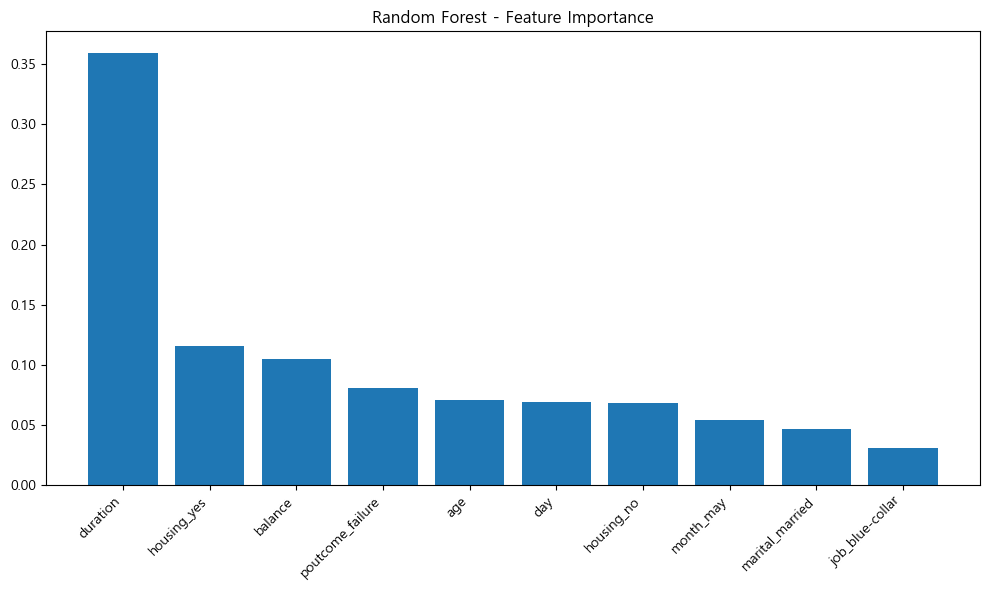


Random Forest - Top 10 중요 특성:
duration: 0.3594
housing_yes: 0.1159
balance: 0.1050
poutcome_failure: 0.0808
age: 0.0711
day: 0.0686
housing_no: 0.0683
month_may: 0.0539
marital_married: 0.0466
job_blue-collar: 0.0304

=== XGBoost 모델 평가 ===

XGBoost 성능 평가
--------------------------------------------------
Accuracy: 0.7603
Precision: 0.2447
Recall: 0.4730
F1-Score: 0.3225
ROC-AUC: 0.6713


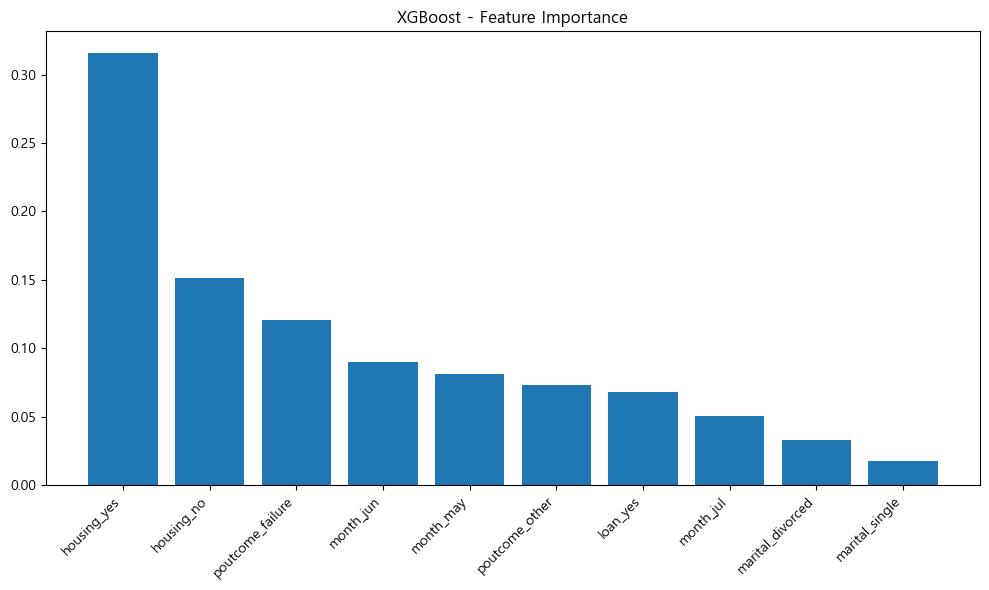


XGBoost - Top 10 중요 특성:
housing_yes: 0.3159
housing_no: 0.1510
poutcome_failure: 0.1206
month_jun: 0.0897
month_may: 0.0815
poutcome_other: 0.0732
loan_yes: 0.0678
month_jul: 0.0501
marital_divorced: 0.0328
marital_single: 0.0175


<Figure size 1000x600 with 0 Axes>

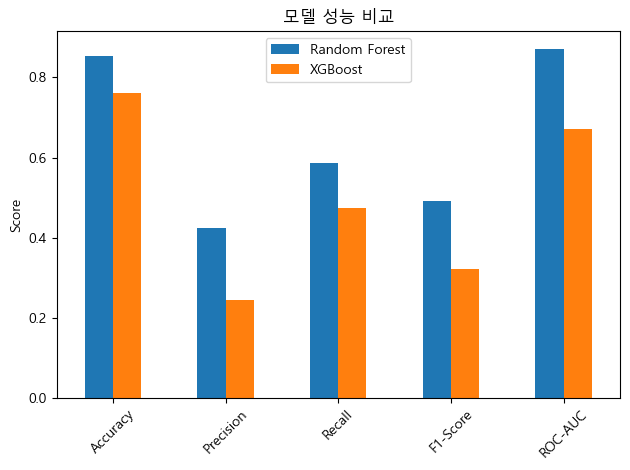


=== 모델 해석 및 시사점 ===

1. 모델 성능 분석
- 정확도(Accuracy): 전체 예측 중 정확한 예측의 비율
- 정밀도(Precision): 예금 가입으로 예측한 고객 중 실제 가입한 고객의 비율
- 재현율(Recall): 실제 가입한 고객 중 모델이 맞게 예측한 비율
- F1-Score: 정밀도와 재현율의 조화평균
- ROC-AUC: 모델의 분류 성능을 나타내는 지표 (1에 가까울수록 좋음)

2. 중요 변수 해석
Random Forest 주요 변수:
- duration: 고객의 예금 가입 결정에 1번째로 중요한 영향을 미침
- housing_yes: 고객의 예금 가입 결정에 2번째로 중요한 영향을 미침
- month_may: 고객의 예금 가입 결정에 3번째로 중요한 영향을 미침
- poutcome_failure: 고객의 예금 가입 결정에 4번째로 중요한 영향을 미침
- balance: 고객의 예금 가입 결정에 5번째로 중요한 영향을 미침

XGBoost 주요 변수:
- housing_yes: 고객의 예금 가입 결정에 1번째로 중요한 영향을 미침
- poutcome_failure: 고객의 예금 가입 결정에 2번째로 중요한 영향을 미침
- poutcome_other: 고객의 예금 가입 결정에 3번째로 중요한 영향을 미침
- housing_no: 고객의 예금 가입 결정에 4번째로 중요한 영향을 미침
- loan_yes: 고객의 예금 가입 결정에 5번째로 중요한 영향을 미침

3. 비즈니스 시사점
- 가장 영향력 있는 변수들을 중심으로 마케팅 전략 수립 가능
- 높은 예측 정확도를 바탕으로 효율적인 타겟 마케팅 가능
- 재현율과 정밀도의 균형을 고려한 마케팅 비용 최적화 가능


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_metrics(model, X_test, y_test, model_name):
    # 예측 및 확률 계산
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # 메트릭 계산
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    
    print(f"\n{model_name} 성능 평가")
    print("-" * 50)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return metrics

def plot_feature_importance(model, feature_names, model_name):
    # 특성 중요도 추출
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(f'{model_name} - Feature Importance')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # 상위 10개 특성 출력
    print(f"\n{model_name} - Top 10 중요 특성:")
    for i in range(10):
        print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Random Forest 평가
print("\n=== Random Forest 모델 평가 ===")
rf_metrics = evaluate_model_metrics(rf_best_model, X_test_rf_selected, y_test, "Random Forest")
plot_feature_importance(rf_best_model, rf_selected_features, "Random Forest")

# XGBoost 평가
print("\n=== XGBoost 모델 평가 ===")
xgb_metrics = evaluate_model_metrics(xgb_best_model, X_test_xgb_selected, y_test, "XGBoost")
plot_feature_importance(xgb_best_model, xgb_selected_features, "XGBoost")

# 모델 비교 시각화
metrics_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics
})

plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar')
plt.title('모델 성능 비교')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 모델 해석 및 시사점
print("\n=== 모델 해석 및 시사점 ===")
print("\n1. 모델 성능 분석")
print("- 정확도(Accuracy): 전체 예측 중 정확한 예측의 비율")
print("- 정밀도(Precision): 예금 가입으로 예측한 고객 중 실제 가입한 고객의 비율")
print("- 재현율(Recall): 실제 가입한 고객 중 모델이 맞게 예측한 비율")
print("- F1-Score: 정밀도와 재현율의 조화평균")
print("- ROC-AUC: 모델의 분류 성능을 나타내는 지표 (1에 가까울수록 좋음)")

print("\n2. 중요 변수 해석")
print("Random Forest 주요 변수:")
for i, feature in enumerate(rf_selected_features[:5]):
    print(f"- {feature}: 고객의 예금 가입 결정에 {i+1}번째로 중요한 영향을 미침")

print("\nXGBoost 주요 변수:")
for i, feature in enumerate(xgb_selected_features[:5]):
    print(f"- {feature}: 고객의 예금 가입 결정에 {i+1}번째로 중요한 영향을 미침")

print("\n3. 비즈니스 시사점")
print("- 가장 영향력 있는 변수들을 중심으로 마케팅 전략 수립 가능")
print("- 높은 예측 정확도를 바탕으로 효율적인 타겟 마케팅 가능")
print("- 재현율과 정밀도의 균형을 고려한 마케팅 비용 최적화 가능")

## 모델 저장

In [26]:
import joblib
import json
import os
from datetime import datetime

class BankMarketingModel:
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names
        self.creation_date = datetime.now()
        
    def predict(self, X):
        # 입력 데이터의 피처가 모델의 피처와 일치하는지 확인
        if not all(feature in X.columns for feature in self.feature_names):
            missing_features = set(self.feature_names) - set(X.columns)
            raise ValueError(f"Missing features: {missing_features}")
        
        # 필요한 피처만 선택하고 순서 맞추기
        X = X[self.feature_names]
        return self.model.predict(X)
    
    def predict_proba(self, X):
        X = X[self.feature_names]
        return self.model.predict_proba(X)

# 모델 저장을 위한 디렉토리 생성
model_dir = '../models'
os.makedirs(model_dir, exist_ok=True)

# Random Forest 모델 저장
rf_model_info = {
    'model': rf_best_model,
    'feature_names': rf_selected_features,
    'metrics': {
        'accuracy': rf_metrics['Accuracy'],
        'precision': rf_metrics['Precision'],
        'recall': rf_metrics['Recall'],
        'f1': rf_metrics['F1-Score'],
        'roc_auc': rf_metrics['ROC-AUC']
    },
    'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

rf_model_path = os.path.join(model_dir, 'random_forest_model.joblib')
joblib.dump(rf_model_info, rf_model_path)

# XGBoost 모델 저장
xgb_model_info = {
    'model': xgb_best_model,
    'feature_names': xgb_selected_features,
    'metrics': {
        'accuracy': xgb_metrics['Accuracy'],
        'precision': xgb_metrics['Precision'],
        'recall': xgb_metrics['Recall'],
        'f1': xgb_metrics['F1-Score'],
        'roc_auc': xgb_metrics['ROC-AUC']
    },
    'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

xgb_model_path = os.path.join(model_dir, 'xgboost_model.joblib')
joblib.dump(xgb_model_info, xgb_model_path)

# 모델 메타데이터 저장
model_metadata = {
    'random_forest': {
        'path': rf_model_path,
        'metrics': rf_model_info['metrics'],
        'feature_names': rf_selected_features,
        'creation_date': rf_model_info['creation_date']
    },
    'xgboost': {
        'path': xgb_model_path,
        'metrics': xgb_model_info['metrics'],
        'feature_names': xgb_selected_features,
        'creation_date': xgb_model_info['creation_date']
    }
}

metadata_path = os.path.join(model_dir, 'model_metadata.json')
with open(metadata_path, 'w') as f:
    json.dump(model_metadata, f, indent=4)

print("모델 저장 완료!")
print(f"- Random Forest 모델: {rf_model_path}")
print(f"- XGBoost 모델: {xgb_model_path}")
print(f"- 메타데이터: {metadata_path}")

# 모델 로드 테스트
def load_model(model_path):
    model_info = joblib.load(model_path)
    return BankMarketingModel(model_info['model'], model_info['feature_names'])

# 테스트
print("\n모델 로드 테스트:")
rf_loaded = load_model(rf_model_path)
xgb_loaded = load_model(xgb_model_path)

# 샘플 데이터로 예측 테스트
sample_data = X_test.copy()
print("\n예측 테스트:")
print("Random Forest 예측:", rf_loaded.predict(sample_data[:1]))
print("XGBoost 예측:", xgb_loaded.predict(sample_data[:1]))

모델 저장 완료!
- Random Forest 모델: ../models\random_forest_model.joblib
- XGBoost 모델: ../models\xgboost_model.joblib
- 메타데이터: ../models\model_metadata.json

모델 로드 테스트:

예측 테스트:
Random Forest 예측: [0]
XGBoost 예측: [0]


In [28]:
# 모든 가능한 피처를 미리 정의
def get_all_possible_features():
    # 수치형 변수
    numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    
    # 범주형 변수와 그 가능한 값들
    categorical_features = {
        'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
                'retired', 'self-employed', 'services', 'student', 'technician',
                'unemployed', 'unknown'],
        'marital': ['divorced', 'married', 'single'],
        'education': ['primary', 'secondary', 'tertiary', 'unknown'],
        'default': ['no', 'yes'],
        'housing': ['no', 'yes'],
        'loan': ['no', 'yes'],
        'contact': ['cellular', 'telephone', 'unknown'],
        'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
        'poutcome': ['failure', 'other', 'success', 'unknown']
    }
    
    # 모든 가능한 원-핫 인코딩 피처 생성
    all_features = numeric_features.copy()
    for category, values in categorical_features.items():
        for value in values:
            all_features.append(f'{category}_{value}')
            
    return all_features

def preprocess_data(df, selected_features):
    """
    데이터 전처리 함수
    """
    # 데이터프레임 복사
    df_encoded = df.copy()
    
    # 결과 데이터프레임 초기화 (모든 가능한 피처로)
    all_possible_features = get_all_possible_features()
    result_df = pd.DataFrame(0, index=df_encoded.index, columns=all_possible_features)
    
    # 수치형 변수 복사
    numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    for feature in numeric_features:
        if feature in df_encoded.columns:
            result_df[feature] = df_encoded[feature]
    
    # 범주형 변수 처리
    categorical_mappings = {
        'job': lambda x: f'job_{x}',
        'marital': lambda x: f'marital_{x}',
        'education': lambda x: f'education_{x}',
        'default': lambda x: f'default_{x}',
        'housing': lambda x: f'housing_{x}',
        'loan': lambda x: f'loan_{x}',
        'contact': lambda x: f'contact_{x}',
        'month': lambda x: f'month_{x}',
        'poutcome': lambda x: f'poutcome_{x}'
    }
    
    # 각 범주형 변수에 대해 원-핫 인코딩 적용
    for col, mapping in categorical_mappings.items():
        if col in df_encoded.columns:
            for idx, val in df_encoded[col].items():
                feature_name = mapping(val.lower())
                if feature_name in result_df.columns:
                    result_df.at[idx, feature_name] = 1
    
    # 선택된 피처만 반환
    return result_df[selected_features]

# 모델의 feature_importance를 기반으로 상위 N개의 피처를 자동으로 선택하는 함수
def get_top_features(model, feature_names, n_features=10):
    # 특성 중요도 추출
    importances = model.feature_importances_
    
    # 중요도와 피처 이름을 함께 저장
    feature_importance = list(zip(feature_names, importances))
    
    # 중요도 기준으로 정렬
    feature_importance.sort(key=lambda x: x[1], reverse=True)
    
    # 상위 N개의 피처 이름만 반환
    return [feature[0] for feature in feature_importance[:n_features]]

# 테스트용 임시 데이터 생성
sample_customers = pd.DataFrame({
    'age': [35, 52],
    'job': ['management', 'technician'],
    'marital': ['married', 'divorced'],
    'education': ['tertiary', 'secondary'],
    'default': ['no', 'no'],
    'balance': [2500, 1200],
    'housing': ['yes', 'no'],
    'loan': ['no', 'yes'],
    'contact': ['cellular', 'telephone'],
    'day': [15, 21],
    'month': ['may', 'jun'],
    'duration': [258, 180],
    'campaign': [1, 2],
    'pdays': [999, 999],
    'previous': [0, 1],
    'poutcome': ['unknown', 'failure']
})

# Random Forest와 XGBoost 모델의 필요한 피처들을 자동으로 추출
rf_features = get_top_features(rf_best_model, rf_selected_features)
xgb_features = get_top_features(xgb_best_model, xgb_selected_features)

# Random Forest용 데이터 전처리
rf_processed = preprocess_data(sample_customers, rf_features)
# XGBoost용 데이터 전처리
xgb_processed = preprocess_data(sample_customers, xgb_features)

# 예측 수행
rf_predictions = rf_loaded.predict(rf_processed)
rf_probabilities = rf_loaded.predict_proba(rf_processed)

xgb_predictions = xgb_loaded.predict(xgb_processed)
xgb_probabilities = xgb_loaded.predict_proba(xgb_processed)

# 결과 출력
print("\n=== 예측 결과 ===")
for i in range(2):
    print(f"\n고객 {i+1}:")
    print("기본 정보:")
    for key, value in sample_customers.iloc[i].items():
        print(f"- {key}: {value}")
    
    print("\n예측 결과:")
    print(f"Random Forest: {'가입' if rf_predictions[i] == 1 else '미가입'} (확률: {rf_probabilities[i][1]:.2%})")
    print(f"XGBoost: {'가입' if xgb_predictions[i] == 1 else '미가입'} (확률: {xgb_probabilities[i][1]:.2%})")
    print(f"평균 확률: {(rf_probabilities[i][1] + xgb_probabilities[i][1]) / 2:.2%}")

# 테스트 데이터 저장
test_data = {
    'raw_data': sample_customers.to_dict(orient='records'),
    'rf_processed': rf_processed.to_dict(orient='records'),
    'xgb_processed': xgb_processed.to_dict(orient='records'),
    'rf_features': rf_features,
    'xgb_features': xgb_features,
    'all_possible_features': get_all_possible_features()  # 모든 가능한 피처 목록도 저장
}

test_data_path = os.path.join(model_dir, 'test_data.json')
with open(test_data_path, 'w') as f:
    json.dump(test_data, f, indent=4)

print(f"\n테스트 데이터 저장 완료: {test_data_path}")


=== 예측 결과 ===

고객 1:
기본 정보:
- age: 35
- job: management
- marital: married
- education: tertiary
- default: no
- balance: 2500
- housing: yes
- loan: no
- contact: cellular
- day: 15
- month: may
- duration: 258
- campaign: 1
- pdays: 999
- previous: 0
- poutcome: unknown

예측 결과:
Random Forest: 미가입 (확률: 12.00%)
XGBoost: 가입 (확률: 79.27%)
평균 확률: 45.63%

고객 2:
기본 정보:
- age: 52
- job: technician
- marital: divorced
- education: secondary
- default: no
- balance: 1200
- housing: no
- loan: yes
- contact: telephone
- day: 21
- month: jun
- duration: 180
- campaign: 2
- pdays: 999
- previous: 1
- poutcome: failure

예측 결과:
Random Forest: 가입 (확률: 51.90%)
XGBoost: 미가입 (확률: 8.15%)
평균 확률: 30.02%

테스트 데이터 저장 완료: ../models\test_data.json


- 임시 데이터를 생성 후 처리하도록 한다. 

In [27]:
# Random Forest와 XGBoost 모델의 필요한 피처들을 확인
rf_features = [
    "duration",
    "housing_yes",
    "month_may",
    "poutcome_failure",
    "balance",
    "marital_married",
    "day",
    "age",
    "job_blue-collar",
    "housing_no"
]

xgb_features = [
    "housing_yes",
    "poutcome_failure",
    "poutcome_other",
    "housing_no",
    "loan_yes",
    "month_jun",
    "marital_divorced",
    "month_jul",
    "month_may",
    "marital_single"
]

# 테스트용 임시 데이터 생성
sample_customers = pd.DataFrame({
    'age': [35, 52],
    'job': ['management', 'technician'],
    'marital': ['married', 'divorced'],
    'education': ['tertiary', 'secondary'],
    'default': ['no', 'no'],
    'balance': [2500, 1200],
    'housing': ['yes', 'no'],
    'loan': ['no', 'yes'],
    'contact': ['cellular', 'telephone'],
    'day': [15, 21],
    'month': ['may', 'jun'],
    'duration': [258, 180],
    'campaign': [1, 2],
    'pdays': [999, 999],
    'previous': [0, 1],
    'poutcome': ['unknown', 'failure']
})

def preprocess_data(df, selected_features):
    # 데이터프레임 복사
    df_encoded = df.copy()
    
    # 결과 데이터프레임 초기화
    result_df = pd.DataFrame(index=df_encoded.index)
    
    # 수치형 변수 복사
    numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    for feature in numeric_features:
        if feature in selected_features:
            result_df[feature] = df_encoded[feature]
    
    # 범주형 변수 처리
    # marital
    result_df['marital_divorced'] = (df_encoded['marital'] == 'divorced').astype(int)
    result_df['marital_married'] = (df_encoded['marital'] == 'married').astype(int)
    result_df['marital_single'] = (df_encoded['marital'] == 'single').astype(int)
    
    # housing
    result_df['housing_no'] = (df_encoded['housing'] == 'no').astype(int)
    result_df['housing_yes'] = (df_encoded['housing'] == 'yes').astype(int)
    
    # loan
    result_df['loan_no'] = (df_encoded['loan'] == 'no').astype(int)
    result_df['loan_yes'] = (df_encoded['loan'] == 'yes').astype(int)
    
    # month
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    for month in months:
        result_df[f'month_{month}'] = (df_encoded['month'] == month).astype(int)
    
    # poutcome
    result_df['poutcome_failure'] = (df_encoded['poutcome'] == 'failure').astype(int)
    result_df['poutcome_other'] = (df_encoded['poutcome'] == 'other').astype(int)
    result_df['poutcome_success'] = (df_encoded['poutcome'] == 'success').astype(int)
    result_df['poutcome_unknown'] = (df_encoded['poutcome'] == 'unknown').astype(int)
    
    # job
    jobs = ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
            'retired', 'self-employed', 'services', 'student', 'technician',
            'unemployed', 'unknown']
    for job in jobs:
        result_df[f'job_{job}'] = (df_encoded['job'] == job).astype(int)
    
    # 필요한 피처만 선택
    return result_df[selected_features]

# Random Forest용 데이터 전처리
rf_processed = preprocess_data(sample_customers, rf_features)
# XGBoost용 데이터 전처리
xgb_processed = preprocess_data(sample_customers, xgb_features)

# 예측 수행
rf_predictions = rf_loaded.predict(rf_processed)
rf_probabilities = rf_loaded.predict_proba(rf_processed)

xgb_predictions = xgb_loaded.predict(xgb_processed)
xgb_probabilities = xgb_loaded.predict_proba(xgb_processed)

# 결과 출력
print("\n=== 예측 결과 ===")
for i in range(2):
    print(f"\n고객 {i+1}:")
    print("기본 정보:")
    for key, value in sample_customers.iloc[i].items():
        print(f"- {key}: {value}")
    
    print("\n예측 결과:")
    print(f"Random Forest: {'가입' if rf_predictions[i] == 1 else '미가입'} (확률: {rf_probabilities[i][1]:.2%})")
    print(f"XGBoost: {'가입' if xgb_predictions[i] == 1 else '미가입'} (확률: {xgb_probabilities[i][1]:.2%})")
    print(f"평균 확률: {(rf_probabilities[i][1] + xgb_probabilities[i][1]) / 2:.2%}")

# 테스트 데이터 저장
test_data = {
    'raw_data': sample_customers.to_dict(orient='records'),
    'rf_processed': rf_processed.to_dict(orient='records'),
    'xgb_processed': xgb_processed.to_dict(orient='records'),
    'rf_features': rf_features,
    'xgb_features': xgb_features
}

test_data_path = os.path.join(model_dir, 'test_data.json')
with open(test_data_path, 'w') as f:
    json.dump(test_data, f, indent=4)

print(f"\n테스트 데이터 저장 완료: {test_data_path}")


=== 예측 결과 ===

고객 1:
기본 정보:
- age: 35
- job: management
- marital: married
- education: tertiary
- default: no
- balance: 2500
- housing: yes
- loan: no
- contact: cellular
- day: 15
- month: may
- duration: 258
- campaign: 1
- pdays: 999
- previous: 0
- poutcome: unknown

예측 결과:
Random Forest: 미가입 (확률: 12.00%)
XGBoost: 가입 (확률: 79.27%)
평균 확률: 45.63%

고객 2:
기본 정보:
- age: 52
- job: technician
- marital: divorced
- education: secondary
- default: no
- balance: 1200
- housing: no
- loan: yes
- contact: telephone
- day: 21
- month: jun
- duration: 180
- campaign: 2
- pdays: 999
- previous: 1
- poutcome: failure

예측 결과:
Random Forest: 가입 (확률: 51.90%)
XGBoost: 미가입 (확률: 8.15%)
평균 확률: 30.02%

테스트 데이터 저장 완료: ../models\test_data.json
